In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.express as px
from math import sqrt


Creating Summaries of all individual metric results

In [69]:
summaries = pd.DataFrame(columns=['CQ Type','Mean_Length','Std_length','Mean_Verb_Count','Std_Verb_Count','Mean_Adjective_Count','Std_Adjective_Count','Mean_Adverb_Count','Std_Adverb_Count','Mean_Pronoun_Count','Std_Pronoun_Count','Mean_Noun_Count','Std_Noun_Count','Mean_Preposition_Count','Std_Preposition_Count','Mean_Conjunction_Count','Std_Conjunction_Count','Mean_Unique_words','Std_Unique_words','Mean_Stopwords','Std_Stopwords','Mean_Flesch-Kincaid Grade','Std_Flesch-Kincaid Grade','Mean_Coleman Liau Index','Std_Coleman Liau Index'])
def create_new_summary_row(results,type):
    new_row = {'CQ Type':type,'Mean_Length': results['Length'].mean(), 'Std_length': results['Length'].std(), 'Mean_Verb_Count': results['Verb_Count'].mean(), 'Std_Verb_Count': results['Verb_Count'].std(), 'Mean_Adjective_Count': results['Adjective_Count'].mean(), 'Std_Adjective_Count': results['Adjective_Count'].std(), 'Mean_Adverb_Count': results['Adverb_Count'].mean(), 'Std_Adverb_Count': results['Adverb_Count'].std(), 'Mean_Pronoun_Count': results['Pronoun_Count'].mean(), 'Std_Pronoun_Count': results['Pronoun_Count'].std(), 'Mean_Noun_Count': results['Noun_Count'].mean(), 'Std_Noun_Count': results['Noun_Count'].std(), 'Mean_Preposition_Count': results['Preposition_Count'].mean(), 'Std_Preposition_Count': results['Preposition_Count'].std(), 'Mean_Conjunction_Count': results['Conjunction_Count'].mean(), 'Std_Conjunction_Count': results['Conjunction_Count'].std(), 'Mean_Unique_words': results['Unique_words'].mean(), 'Std_Unique_words': results['Unique_words'].std(), 'Mean_Stopwords': results['Stopwords'].mean(), 'Std_Stopwords': results['Stopwords'].std(), 'Mean_Flesch-Kincaid Grade': results['Flesch-Kincaid Grade'].mean(), 'Std_Flesch-Kincaid Grade': results['Flesch-Kincaid Grade'].std(), 'Mean_Coleman Liau Index': results['Coleman Liau Index'].mean(), 'Std_Coleman Liau Index': results['Coleman Liau Index'].std()}
    return new_row


Formatting the content in the DataFrame

In [70]:
def get_template_num(x):
    if x[-1].isdigit():
        return x[-2:]
    else:
        return 0
    
def convert_to_int(x):
    try:
        return int(x)
    except:
        return x
    
def extract_model(x):
    models = ['flan-base', 'flan-large','pythia']
    for model in models:
        if model in x:
            return model
        
def extract_method(x):
    methods = ['Zero Shot','Few Shot Good', 'Few Shot Good and Bad','Filling Chunks with LOV', 'Filling Examples','Using Chunks','Using Triples','LOV','ROH']
    for method in methods:
        if method == 'LOV':
            if method in x and 'Filling' not in x:
                return method
        if method == 'Few Shot Good':
            if method in x and 'Bad' not in x:
                return method
        else:
            if method in x:
                return method

Load the results into a single data frame

In [71]:
results = {}
for result in os.listdir('all_results'):
    name = result.split('.')[0]
    results[name] = pd.read_csv(f'all_results/{result}', index_col=0)

summaries = pd.DataFrame(columns=['CQ Type','Mean_Length','Std_length','Mean_Verb_Count','Std_Verb_Count','Mean_Adjective_Count','Std_Adjective_Count','Mean_Adverb_Count','Std_Adverb_Count','Mean_Pronoun_Count','Std_Pronoun_Count','Mean_Noun_Count','Std_Noun_Count','Mean_Preposition_Count','Std_Preposition_Count','Mean_Conjunction_Count','Std_Conjunction_Count','Mean_Unique_words','Std_Unique_words','Mean_Stopwords','Std_Stopwords','Mean_Flesch-Kincaid Grade','Std_Flesch-Kincaid Grade','Mean_Coleman Liau Index','Std_Coleman Liau Index'])
for key in results.keys():
    summaries.loc[len(summaries)] = create_new_summary_row(results[key],key)
summaries.to_csv('all_summaries.csv')
summaries.to_latex('all_summaries.tex')

summaries['Num Templates'] = summaries['CQ Type'].apply(get_template_num)
summaries['Num Templates'] = summaries['Num Templates'].apply(convert_to_int)
summaries['Model'] = summaries['CQ Type'].apply(extract_model)
summaries['Method'] = summaries['CQ Type'].apply(extract_method)



        




In [72]:
all_results = {}
for result in os.listdir('all_results'):
    name = result.split('.')[0]
    all_results[name] = pd.read_csv(f'all_results/{result}', index_col=0)

Here we create ditionaries to make data easier to handle

In [73]:
methods = ['Zero Shot','Few Shot Good', 'Few Shot Good and Bad','Filling Chunks with LOV', 'Filling Examples','Using Chunks','Using Triples','LOV','ROH']
ends = ['flan-base', 'flan-large','pythia']
template_nos = [1,5,10,15,20,25]
syntax_results = {}
syntax_results_template_no = {}
for method in methods:
    syntax_results[method] = summaries[summaries['CQ Type'].str.contains(method)]
    print(syntax_results[method])
    syntax_results[method] = syntax_results[method].reset_index(drop=True)

drops = syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['CQ Type'].str.contains('Bad')].index
syntax_results['Few Shot Good'] = syntax_results['Few Shot Good'].drop(drops)
drops = syntax_results['LOV'][syntax_results['LOV']['CQ Type'].str.contains('with')].index
syntax_results['LOV'] = syntax_results['LOV'].drop(drops)

for end in ends:
    ends_specified = summaries[summaries['CQ Type'].str.contains(end)]
    syntax_results_template_no[end] = ends_specified.reset_index(drop=True)
    for method in methods[:-2]:
        syntax_results[f'{method} {end}'] = summaries[summaries['CQ Type'].str.contains(method)]
        syntax_results[f'{method} {end}'] = syntax_results[method].reset_index(drop=True)

    for num in template_nos:
        if num == 5:
            syntax_results_template_no[f'{end} {num}'] = ends_specified[ends_specified['CQ Type'].str.endswith(f' {num}')]
            syntax_results_template_no[f'{end} {num}'] = syntax_results_template_no[f'{end} {num}'].reset_index(drop=True)
        else:
            syntax_results_template_no[f'{end} {num}'] = ends_specified[ends_specified['CQ Type'].str.endswith(f'{num}')]
            syntax_results_template_no[f'{end} {num}'] = syntax_results_template_no[f'{end} {num}'].reset_index(drop=True)




                           CQ Type  Mean_Length  Std_length  Mean_Verb_Count  \
110            Zero Shot flan-base         10.8    3.259175              1.3   
111           Zero Shot flan-large          9.2    2.780887              0.9   
112                Zero Shot Llama         12.4    3.717825              0.7   
113  Zero Shot pythia-410m-deduped         15.3    5.963780              2.1   

     Std_Verb_Count  Mean_Adjective_Count  Std_Adjective_Count  \
110        1.059350                   1.2             0.788811   
111        0.567646                   0.6             0.516398   
112        0.674949                   1.0             1.054093   
113        0.875595                   0.9             0.875595   

     Mean_Adverb_Count  Std_Adverb_Count  Mean_Pronoun_Count  ...  \
110                0.1          0.316228                 1.3  ...   
111                0.1          0.316228                 0.9  ...   
112                0.6          0.843274                 0.3 

Showing how the mean length changes depending on prompt technique for each model

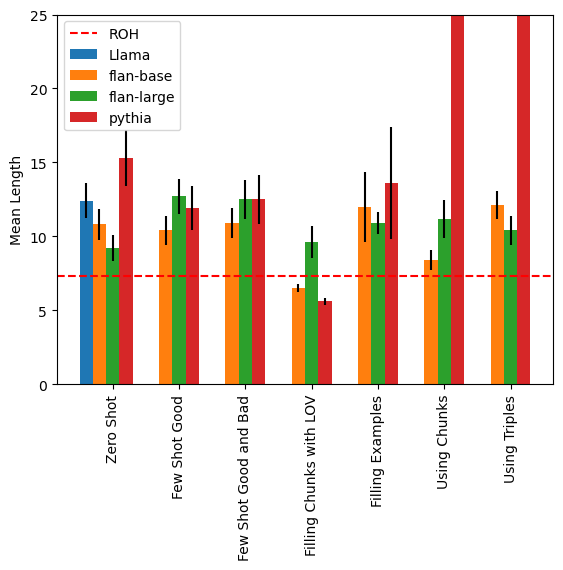

In [74]:
mean_lengths = pd.DataFrame({'Zero Shot': [syntax_results['Zero Shot']['Mean_Length'][2],syntax_results['Zero Shot']['Mean_Length'][0], syntax_results['Zero Shot']['Mean_Length'][1],syntax_results['Zero Shot']['Mean_Length'][3]],
                            'Few Shot Good' : [0,syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Few Shot Good and Bad' : [0,syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Filling Chunks with LOV' : [0,syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Filling Examples' : [0,syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Using Chunks' : [0,syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Using Triples' : [0,syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[0], syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[1],syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]]
                            },index = ['Llama','flan-base','flan-large','pythia'])
mean_lengths_std = pd.DataFrame({'Zero Shot': [syntax_results['Zero Shot']['Std_length'][2],syntax_results['Zero Shot']['Std_length'][0], syntax_results['Zero Shot']['Std_length'][1],syntax_results['Zero Shot']['Std_length'][3]],
                            'Few Shot Good' : [0,syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]],
                            'Few Shot Good and Bad' : [0,syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]],
                            'Filling Chunks with LOV' : [0,syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]],
                            'Filling Examples' : [0,syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]],
                            'Using Chunks' : [0,syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]],
                            'Using Triples' : [0,syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[0], syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[1],syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_length'].reset_index(drop=True)[2]]
                            },index = ['Llama','flan-base','flan-large','pythia'])

x = np.arange(7)
mean_lengths = mean_lengths.T
mean_lengths_std = mean_lengths_std.T
plt.bar(x-0.4,mean_lengths['Llama'],width=0.2,label='Llama',yerr=mean_lengths_std['Llama']/sqrt(10))
plt.bar(x-0.2,mean_lengths['flan-base'],width=0.2,label='flan-base',yerr=mean_lengths_std['flan-base']/sqrt(10))
plt.bar(x,mean_lengths['flan-large'],width=0.2,label='flan-large',yerr=mean_lengths_std['flan-large']/sqrt(10))
plt.bar(x+0.2,mean_lengths['pythia'],width=0.2,label='pythia',yerr=mean_lengths_std['pythia']/sqrt(10))
plt.xticks(x,mean_lengths.index,rotation=90)
plt.ylim(0,25)

plt.ylabel('Mean Length')
plt.axhline(y = syntax_results['ROH']['Mean_Length'][0],color='red',label='ROH',linestyle='--')
plt.legend()


The effect that different prompting techniques has on the flesch kincaid score 

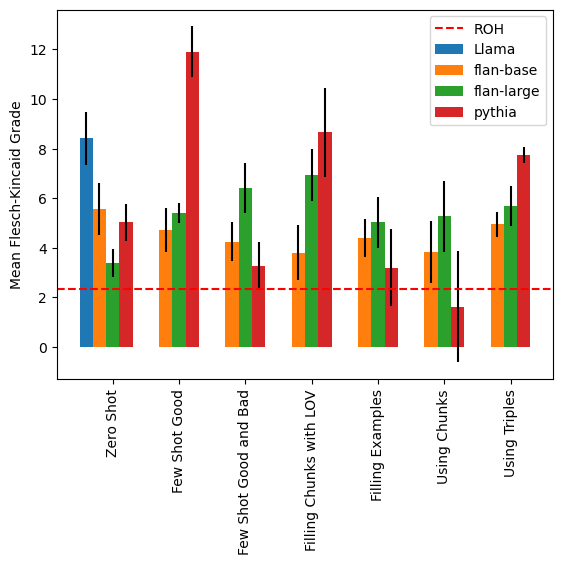

In [75]:
mean_lengths = pd.DataFrame({'Zero Shot': [syntax_results['Zero Shot']['Mean_Flesch-Kincaid Grade'][2],syntax_results['Zero Shot']['Mean_Flesch-Kincaid Grade'][0], syntax_results['Zero Shot']['Mean_Flesch-Kincaid Grade'][1],syntax_results['Zero Shot']['Mean_Flesch-Kincaid Grade'][3]],
                            'Few Shot Good' : [0,syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Mean_Length'].reset_index(drop=True)[2]],
                            'Few Shot Good and Bad' : [0,syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Filling Chunks with LOV' : [0,syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Filling Examples' : [0,syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Using Chunks' : [0,syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Using Triples' : [0,syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)[2]]
                            },index = ['Llama','flan-base','flan-large','pythia'])
mean_lengths_std = pd.DataFrame({'Zero Shot': [syntax_results['Zero Shot']['Std_Flesch-Kincaid Grade'][2], syntax_results['Zero Shot']['Std_Flesch-Kincaid Grade'][0], syntax_results['Zero Shot']['Std_Flesch-Kincaid Grade'][1],syntax_results['Zero Shot']['Std_Flesch-Kincaid Grade'][3]],
                            'Few Shot Good' : [0,syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Few Shot Good'][syntax_results['Few Shot Good']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Few Shot Good and Bad' : [0,syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Few Shot Good and Bad'][syntax_results['Few Shot Good and Bad']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Filling Chunks with LOV' : [0,syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Filling Chunks with LOV'][syntax_results['Filling Chunks with LOV']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Filling Examples' : [0,syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Filling Examples'][syntax_results['Filling Examples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Using Chunks' : [0,syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Using Chunks'][syntax_results['Using Chunks']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]],
                            'Using Triples' : [0,syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[0], syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[1],syntax_results['Using Triples'][syntax_results['Using Triples']['Num Templates']==10]['Std_Flesch-Kincaid Grade'].reset_index(drop=True)[2]]
                            },index = ['Llama','flan-base','flan-large','pythia'])

x = np.arange(7)
mean_lengths = mean_lengths.T
mean_lengths_std = mean_lengths_std.T
plt.bar(x-0.4,mean_lengths['Llama'],width=0.2,label='Llama',yerr=mean_lengths_std['Llama']/sqrt(10))
plt.bar(x-0.2,mean_lengths['flan-base'],width=0.2,label='flan-base',yerr=mean_lengths_std['flan-base']/sqrt(10))
plt.bar(x,mean_lengths['flan-large'],width=0.2,label='flan-large',yerr=mean_lengths_std['flan-large']/sqrt(10))
plt.bar(x+0.2,mean_lengths['pythia'],width=0.2,label='pythia',yerr=mean_lengths_std['pythia']/sqrt(10))
plt.xticks(x,mean_lengths.index,rotation=90)


plt.ylabel('Mean Flesch-Kincaid Grade')
plt.axhline(y = syntax_results['ROH']['Mean_Flesch-Kincaid Grade'][0],color='red',label='ROH',linestyle='--')
plt.legend()


Readabilty with increased numbers

25
25
25


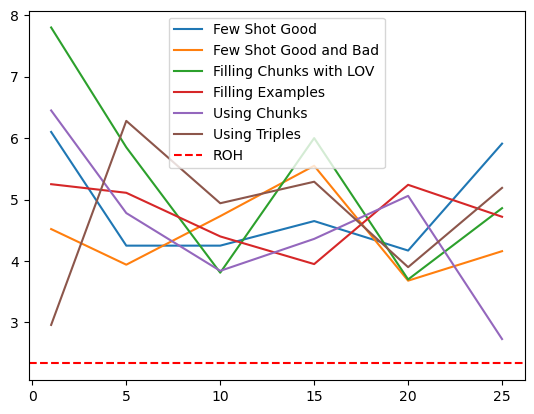

In [76]:
template_nos = [1,5,10,15,20,25]
methods = ['Few Shot Good', 'Few Shot Good and Bad','Filling Chunks with LOV', 'Filling Examples','Using Chunks','Using Triples']
models = ['flan-base','flan-large','pythia']
syntax_results_template_no['flan-base']
templates = {}
#templates = pd.DataFrame(columns = ['Type','1','5','10','15','20','25'])
for method in models:
    
            print(f'{num}')
            templates[f'{method}'] = pd.DataFrame(columns = ['Type','1','5','10','15','20','25'])
            templates[f'{method}']['Type'] = methods
            templates[f'{method}']['1'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f'1')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)
            templates[f'{method}']['5'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f' 5')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)
            templates[f'{method}']['10'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f'10')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)
            templates[f'{method}']['15'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f'15')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)
            templates[f'{method}']['20'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f'20')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)
            templates[f'{method}']['25'] = syntax_results_template_no[method][syntax_results_template_no[method]['CQ Type'].str.endswith(f'25')]['Mean_Flesch-Kincaid Grade'].reset_index(drop=True)

x = [1,5,10,15,20,25]         
plt.plot(x,templates['flan-base'].loc[0][1:].tolist(),label='Few Shot Good')
plt.plot(x,templates['flan-base'].loc[1][1:].tolist(),label='Few Shot Good and Bad')
plt.plot(x,templates['flan-base'].loc[2][1:].tolist(),label='Filling Chunks with LOV')
plt.plot(x,templates['flan-base'].loc[3][1:].tolist(),label='Filling Examples')
plt.plot(x,templates['flan-base'].loc[4][1:].tolist(),label='Using Chunks')
plt.plot(x,templates['flan-base'].loc[5][1:].tolist(),label='Using Triples')
plt.axhline(y = syntax_results['ROH']['Mean_Flesch-Kincaid Grade'].to_list()[0], color = 'r', linestyle = '--', label='ROH')
plt.legend()


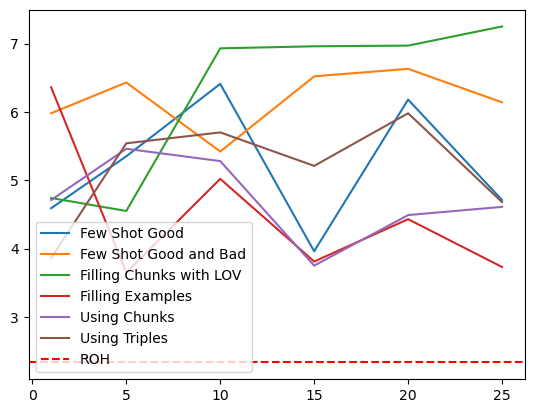

In [77]:
plt.plot(x,templates['flan-large'].loc[0][1:].tolist(),label='Few Shot Good')
plt.plot(x,templates['flan-large'].loc[1][1:].tolist(),label='Few Shot Good and Bad')
plt.plot(x,templates['flan-large'].loc[2][1:].tolist(),label='Filling Chunks with LOV')
plt.plot(x,templates['flan-large'].loc[3][1:].tolist(),label='Filling Examples')
plt.plot(x,templates['flan-large'].loc[4][1:].tolist(),label='Using Chunks')
plt.plot(x,templates['flan-large'].loc[5][1:].tolist(),label='Using Triples')
plt.axhline(y = syntax_results['ROH']['Mean_Flesch-Kincaid Grade'].to_list()[0], color = 'r', linestyle = '--', label='ROH')
plt.legend()

Kolmogorov-Smirnoff Test Word Length

In [78]:
from scipy.stats import ks_2samp 
all_ks_results = {}
for column in all_results['Few Shot Good and Bad flan-base 1'].columns[:-1]:
    ks_results = pd.DataFrame(columns=['Type','KS Statistic','P-Value'])
    all_ks_results[column] = ks_results
    for key in all_results.keys():
        all_ks_results[column].loc[len(all_ks_results[column])] = [key,ks_2samp(all_results[key][column],all_results['ROH'][column],).statistic,ks_2samp(all_results[key][column],all_results['ROH'][column]).pvalue]

for key in all_ks_results.keys():
    all_ks_results[key]['Num Templates'] = all_ks_results[key]['Type'].apply(get_template_num)
    all_ks_results[key]['Num Templates'] = all_ks_results[key]['Num Templates'].apply(convert_to_int)
    all_ks_results[key]['Model'] = all_ks_results[key]['Type'].apply(extract_model)
    all_ks_results[key]['Method'] = all_ks_results[key]['Type'].apply(extract_method)
    all_ks_results[key]['Aspect'] = key
    all_ks_results[key] = all_ks_results[key].sort_values(by=['Method','Model','Num Templates']).reset_index(drop=True)


In [79]:
all_ks_results['Length']

,Type,KS Statistic,P-Value,Num Templates,Model,Method,Aspect
0,Few Shot Good flan-base 1,0.435374,3.938359e-02,1,flan-base,Few Shot Good,Length
1,Few Shot Good flan-base 5,0.435374,3.938359e-02,5,flan-base,Few Shot Good,Length
2,Few Shot Good flan-base 10,0.530612,5.583853e-03,10,flan-base,Few Shot Good,Length
3,Few Shot Good flan-base 15,0.625170,4.872741e-04,15,flan-base,Few Shot Good,Length
4,Few Shot Good flan-base 20,0.430612,4.299970e-02,20,flan-base,Few Shot Good,Length
...,...,...,...,...,...,...,...
109,Using Triples pythia-410m-deduped 25,1.000000,1.068723e-15,25,pythia,Using Triples,Length
110,Zero Shot flan-base,0.525170,6.337789e-03,0,flan-base,Zero Shot,Length
111,Zero Shot flan-large,0.330612,2.047508e-01,0,flan-large,Zero Shot,Length
112,Zero Shot pythia-410m-deduped,0.625170,4.872741e-04,0,pythia,Zero Shot,Length


In [101]:
all_ks_results['Length'][['Type','KS Statistic','P-Value']].to_latex('length_ks.tex')

In [81]:
all_ks_results['Length']
ks_method_models = {}
models = ['flan-base','flan-large','pythia']
methods = ['Zero Shot','Few Shot Good', 'Few Shot Good and Bad','Filling Chunks with LOV', 'Filling Examples','Using Chunks','Using Triples','LOV','ROH']
for model in models:
    ks_method_models[model] = {}
    for method in methods[:-2]:

        df = pd.DataFrame(columns=['Type','KS Statistic','P-Value','Num Templates','Model','Method','Aspect'])
        for key in all_ks_results.keys():
            if key != 'cq':
                for i in range(len(all_ks_results[key])):
                    if all_ks_results[key]['Method'][i] == method and all_ks_results[key]['Model'][i] == model:
                        
                            
                        if all_ks_results[key]['P-Value'][i] > 0.05:
                            df.loc[len(df)] = all_ks_results[key].loc[i]
                     
                            ks_method_models[model][method] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Model'] == model][all_ks_results[key]['Method'] == method])*12)
                        
             
df = pd.DataFrame(columns=['Type','KS Statistic','P-Value','Num Templates','Model','Method','Aspect'])
for key in all_ks_results.keys():
    if key != 'cq':
        for i in range(len(all_ks_results[key])):
            if all_ks_results[key]['Method'][i] == 'LOV':
                if all_ks_results[key]['P-Value'][i] > 0.05:
                    df.loc[len(df)] = all_ks_results[key].loc[i]
                    ks_method_models['LOV'] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Method'] == 'LOV'])*12)
                







    

C:\Users\willi\AppData\Local\Temp\ipykernel_14160\1547003887.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_models[model][method] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Model'] == model][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\1547003887.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_models[model][method] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Model'] == model][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\1547003887.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_models[model][method] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Model'] == model][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\1547003887.py:19: UserWarning: Boolean Series key will b

The following results show the proportion of KS Tests that each promt technique passed

In [82]:
ks_method_models['flan-base']

{'Zero Shot': 0.5,
 'Few Shot Good': 0.6944444444444444,
 'Few Shot Good and Bad': 0.5972222222222222,
 'Filling Chunks with LOV': 0.7222222222222222,
 'Filling Examples': 0.625,
 'Using Chunks': 0.8472222222222222,
 'Using Triples': 0.75}

In [83]:
ks_method_models['flan-large']

{'Zero Shot': 0.8333333333333334,
 'Few Shot Good': 0.4305555555555556,
 'Few Shot Good and Bad': 0.5694444444444444,
 'Filling Chunks with LOV': 0.6805555555555556,
 'Filling Examples': 0.625,
 'Using Chunks': 0.5416666666666666,
 'Using Triples': 0.5972222222222222}

In [84]:
ks_method_models['pythia']

{'Zero Shot': 0.4166666666666667,
 'Few Shot Good': 0.6527777777777778,
 'Few Shot Good and Bad': 0.625,
 'Filling Chunks with LOV': 0.5,
 'Filling Examples': 0.7777777777777778,
 'Using Chunks': 0.5416666666666666}

In [85]:
all_ks_results['Length']['Type']

0                 Few Shot Good flan-base 1
1                 Few Shot Good flan-base 5
2                Few Shot Good flan-base 10
3                Few Shot Good flan-base 15
4                Few Shot Good flan-base 20
                       ...                 
109    Using Triples pythia-410m-deduped 25
110                     Zero Shot flan-base
111                    Zero Shot flan-large
112           Zero Shot pythia-410m-deduped
113                         Zero Shot Llama
Name: Type, Length: 114, dtype: object

In [86]:
all_ks_results['Length']
ks_method_nums = {}
nums = [1,5,10,15,20,25]
methods = ['Zero Shot','Few Shot Good', 'Few Shot Good and Bad','Filling Chunks with LOV', 'Filling Examples','Using Chunks','Using Triples','LOV','ROH']

for method in methods[:-2]:
    ks_method_nums[method] = {}
    for num in nums:
        df = pd.DataFrame(columns=['Type','KS Statistic','P-Value','Num Templates','Model','Method','Aspect'])
        for key in all_ks_results.keys():
            if key != 'cq':
                for i in range(len(all_ks_results[key])):
                    if all_ks_results[key]['Method'][i] == method and all_ks_results[key]['Num Templates'][i] == num:
                        if all_ks_results[key]['P-Value'][i] > 0.05:
                            df.loc[len(df)] = all_ks_results[key].loc[i]
                        
                            ks_method_nums[method][num] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Num Templates'] == num][all_ks_results[key]['Method'] == method])*12)
                

ks_method_nums['LOV'] = {}
for key in all_ks_results.keys():
        if key != 'cq':
            ks_method_nums['LOV'][key] = all_ks_results[key][all_ks_results[key]['Type']=='LOV'][['KS Statistic','P-Value']]




    

C:\Users\willi\AppData\Local\Temp\ipykernel_14160\2336384177.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_nums[method][num] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Num Templates'] == num][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\2336384177.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_nums[method][num] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Num Templates'] == num][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\2336384177.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ks_method_nums[method][num] = len(df)/(len(all_ks_results[key][all_ks_results[key]['Num Templates'] == num][all_ks_results[key]['Method'] == method])*12)
C:\Users\willi\AppData\Local\Temp\ipykernel_14160\2336384177.py:17: UserWarning: Boolean Series key 

In [87]:
ks_method_nums['Few Shot Good']


{1: 0.6111111111111112,
 5: 0.6388888888888888,
 10: 0.5,
 15: 0.5277777777777778,
 20: 0.6666666666666666,
 25: 0.6111111111111112}

In [88]:
ks_method_nums['Few Shot Good and Bad']

{1: 0.5833333333333334,
 5: 0.5833333333333334,
 10: 0.5555555555555556,
 15: 0.5555555555555556,
 20: 0.6666666666666666,
 25: 0.6388888888888888}

In [89]:
ks_method_nums['Filling Chunks with LOV']

{1: 0.5555555555555556,
 5: 0.6111111111111112,
 10: 0.5555555555555556,
 15: 0.6111111111111112,
 20: 0.75,
 25: 0.7222222222222222}

In [90]:
ks_method_nums['Filling Examples']

{1: 0.5833333333333334,
 5: 0.5833333333333334,
 10: 0.6666666666666666,
 15: 0.8611111111111112,
 20: 0.5833333333333334,
 25: 0.7777777777777778}

In [91]:
ks_method_nums['Using Chunks']

{1: 0.5,
 5: 0.6666666666666666,
 10: 0.7777777777777778,
 15: 0.6944444444444444,
 20: 0.5833333333333334,
 25: 0.6388888888888888}

In [92]:
ks_method_nums['Using Triples']

{1: 0.5555555555555556,
 5: 0.4444444444444444,
 10: 0.3611111111111111,
 15: 0.2777777777777778,
 20: 0.5555555555555556,
 25: 0.5}

Sentence Property Box Plots

In [93]:

Zero_base = pd.melt(all_results['Zero Shot flan-base'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
Zero_base['Model'] = 'Zero Shot flan-base'
Zero_large = pd.melt(all_results['Zero Shot flan-large'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
Zero_large['Model'] = 'Zero Shot flan-large'
Zero_pythia = pd.melt(all_results['Zero Shot pythia-410m-deduped'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
Zero_pythia['Model'] = 'Zero Shot pythia'
Zero_llama = pd.melt(all_results['Zero Shot Llama'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
Zero_llama['Model'] = 'Zero Shot Llama'
ROH = pd.melt(all_results['ROH'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
ROH['Model'] = 'ROH'
LOV_melt = pd.melt(all_results['LOV'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
LOV_melt['Model'] = 'LOV'
boxplot_data = pd.concat([ROH,Zero_base,Zero_large,Zero_pythia,Zero_llama])

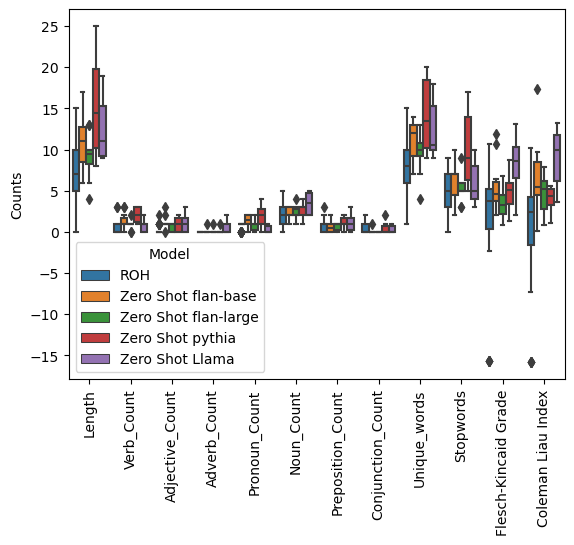

In [94]:
g = sns.boxplot(x='variable',y='value',hue = 'Model',data=boxplot_data)
g.set(ylabel='Counts')
g.set(xlabel='')
g.set_xticklabels(labels=['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index'],rotation =90)
plt.savefig('plots/boxplot_zeroshot_comparison_ROH.png')

Function to produce boxplot for each prompting technique

In [95]:
methods = ['Few Shot Good','Few Shot Good and Bad','Filling Chunks with LOV','Filling Examples','Using Chunks','Using Triples']
def create_boxplots(method):
    Zero_base = pd.melt(all_results[f'{method} flan-base 10'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    Zero_base['Model'] = f'{method} flan-base'
    Zero_large = pd.melt(all_results[f'{method} flan-large 10'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    Zero_large['Model'] = f'{method} flan-large'
    Zero_pythia = pd.melt(all_results[f'{method} pythia-410m-deduped 10'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    Zero_pythia['Model'] = f'{method} pythia'
    Zero_llama = pd.melt(all_results['Zero Shot Llama'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    Zero_llama['Model'] = 'Zero Shot Llama'
    ROH = pd.melt(all_results['ROH'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    ROH['Model'] = 'ROH'
    LOV_melt = pd.melt(all_results['LOV'].loc[:,['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index']])
    LOV_melt['Model'] = 'LOV'
    boxplot_data = pd.concat([ROH,Zero_base,Zero_large,Zero_pythia,Zero_llama])
    g = sns.boxplot(x='variable',y='value',hue = 'Model',data=boxplot_data)
    g.set(ylabel='Counts')
    g.set(xlabel='')
    g.set_xticklabels(labels=['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index'],rotation =90)
    plt.savefig(f'plots/boxplot_{method}.png',bbox_inches='tight')
    

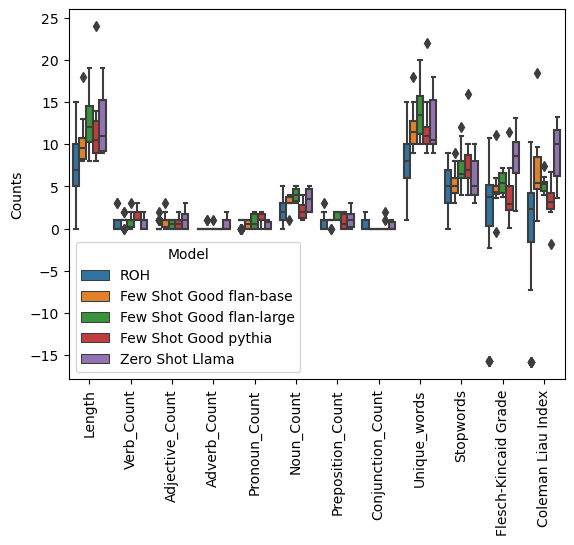

In [96]:
create_boxplots('Few Shot Good')

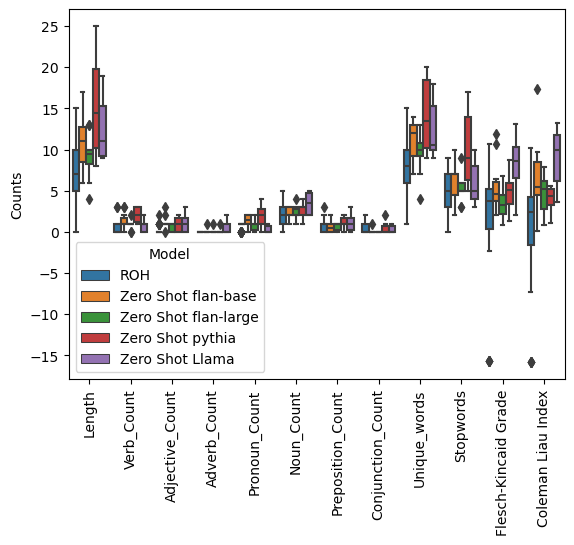

In [97]:
g = sns.boxplot(x='variable',y='value',hue = 'Model',data=boxplot_data)
g.set(ylabel='Counts')
g.set(xlabel='')
g.set_xticklabels(labels=['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index'],rotation =90)
fig = g.get_figure()


Box Plot Comparing 

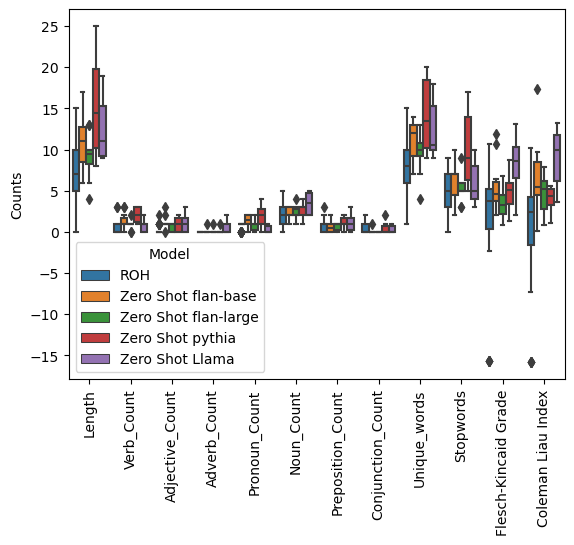

In [98]:
g = sns.boxplot(x='variable',y='value',hue = 'Model',data=boxplot_data)
g.set(ylabel='Counts')
g.set(xlabel='')
g.set_xticklabels(labels=['Length','Verb_Count','Adjective_Count','Adverb_Count','Pronoun_Count','Noun_Count','Preposition_Count','Conjunction_Count','Unique_words','Stopwords','Flesch-Kincaid Grade','Coleman Liau Index'],rotation =90)
fig = g.get_figure()
fig.savefig('plots/boxplot_ROH_LOV.png')